In [1]:
from torchvision import datasets, transforms, utils
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import os
from gan_model import Discriminator, Generator
from fid_score import *
from inception import *
import pandas as pd

In [2]:
seed = 42
torch.manual_seed(seed)
np.random.seed(seed)
os.environ['PYTHONHASHSEED']=str(seed)

In [3]:
if torch.cuda.is_available():
    dev = "cuda:0"
else:
    dev = "cpu"
dev = torch.device(dev)

In [4]:
trans_cifar = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
dataset = datasets.CIFAR10(root='./datasets/cifar/', train=False, download=True, transform=trans_cifar)
dataloader_test = torch.utils.data.DataLoader(dataset, shuffle = True,batch_size=10000)


Files already downloaded and verified


In [5]:
# create test images of the chosen classes
for img in dataloader_test:
    x, y = img
    chosen_imgs = []
    for xx,yy in zip(x,y):
        # if(yy in [9,1,5,3]):
        chosen_imgs.append(xx)
    test_imgs=chosen_imgs
    # test_imgs=img[0].to(dev)
test_imgs = torch.stack(test_imgs)

In [6]:
epochs = 30
gen_count_to_test = 9
file_loc = [
'runs/2W_CTDC_MAX_LOSS/models/G_epoch_150',
'runs/2W_CTDC_MIN_LOSS/models/G_epoch_150',

'runs/2W_CTDC_MAX_LOSS_OVERR_1to1_same_lr/models/G_epoch_150',
'runs/2W_CTDC_MIN_LOSS_OVERR_1to1_same_lr/models/G_epoch_150',

'runs/2W_CTDC_WAVG_MAXLOSS_1to1_same_lr/models/g_EPOCH_149',
'runs/2W_CTDC_WAVG_MINLOSS_1to1_same_lr/models/g_EPOCH_149',

'runs/2W_CTDC_WAVG_MAXLOSS_1to1_diff_lr/models/g_EPOCH_150',
'runs/2W_CDTC_WAVG_MAXLOSS_3to1_same_lr/models/g_EPOCH_150',
'runs/2W_CTDC_WAVG_MINLOSS_2to1_same_lr/models/g_epoch_149',
]
assert gen_count_to_test == len(file_loc)

NOISE_DIM = 128
FID_BATCH_SIZE = 30
fic_model = InceptionV3().to(dev)
generators = {}
for i in range(gen_count_to_test):
    key = f'gen{i}'
    generators[key] = Generator().to(dev)
    generators[key].load_state_dict(torch.load(file_loc[i]))


In [7]:
fid_avg = []
for epoch in range(epochs):
    fid_z = torch.randn(FID_BATCH_SIZE, NOISE_DIM, 1,1).to(dev)
    random_start = np.random.randint(len(test_imgs)-FID_BATCH_SIZE)
    for i,gen in enumerate(generators.values()):
        if epoch == 0:
            fid_avg.append([])
        gen_imgs = gen(fid_z.detach())
        mu_gen, sigma_gen = calculate_activation_statistics(gen_imgs, fic_model, batch_size=FID_BATCH_SIZE,cuda=True)
        mu_test, sigma_test = calculate_activation_statistics(test_imgs[random_start:random_start+FID_BATCH_SIZE], fic_model, batch_size=FID_BATCH_SIZE,cuda=True)
        fid = calculate_frechet_distance(mu_gen, sigma_gen, mu_test, sigma_test)
        fid_avg[i].append(fid)
        print(f'gen#{i}/epoch#{epoch} fid_score: {fid:0.2f}')

100%|██████████| 1/1 [00:00<00:00,  5.46it/s]


gen#0/epoch#0 fid_score: 225.99


100%|██████████| 1/1 [00:00<00:00,  5.55it/s]


gen#1/epoch#0 fid_score: 230.57


100%|██████████| 1/1 [00:00<00:00,  5.55it/s]


gen#2/epoch#0 fid_score: 222.86


100%|██████████| 1/1 [00:00<00:00,  5.56it/s]


gen#3/epoch#0 fid_score: 224.53


100%|██████████| 1/1 [00:00<00:00,  4.92it/s]


gen#4/epoch#0 fid_score: 229.58


100%|██████████| 1/1 [00:00<00:00,  4.93it/s]


gen#5/epoch#0 fid_score: 224.24


100%|██████████| 1/1 [00:00<00:00,  5.03it/s]


gen#6/epoch#0 fid_score: 221.38


100%|██████████| 1/1 [00:00<00:00,  4.92it/s]


gen#7/epoch#0 fid_score: 233.00


100%|██████████| 1/1 [00:00<00:00,  4.98it/s]


gen#8/epoch#0 fid_score: 227.18


100%|██████████| 1/1 [00:00<00:00,  5.02it/s]


gen#0/epoch#1 fid_score: 210.60


100%|██████████| 1/1 [00:00<00:00,  5.52it/s]


gen#1/epoch#1 fid_score: 213.81


100%|██████████| 1/1 [00:00<00:00,  5.04it/s]


gen#2/epoch#1 fid_score: 214.48


100%|██████████| 1/1 [00:00<00:00,  4.95it/s]


gen#3/epoch#1 fid_score: 210.46


100%|██████████| 1/1 [00:00<00:00,  4.93it/s]


gen#4/epoch#1 fid_score: 211.68


100%|██████████| 1/1 [00:00<00:00,  5.04it/s]


gen#5/epoch#1 fid_score: 211.93


100%|██████████| 1/1 [00:00<00:00,  4.96it/s]


gen#6/epoch#1 fid_score: 214.99


100%|██████████| 1/1 [00:00<00:00,  5.04it/s]


gen#7/epoch#1 fid_score: 216.52


100%|██████████| 1/1 [00:00<00:00,  4.89it/s]


gen#8/epoch#1 fid_score: 213.13


100%|██████████| 1/1 [00:00<00:00,  5.53it/s]


gen#0/epoch#2 fid_score: 243.49


100%|██████████| 1/1 [00:00<00:00,  5.52it/s]


gen#1/epoch#2 fid_score: 218.01


100%|██████████| 1/1 [00:00<00:00,  4.99it/s]


gen#2/epoch#2 fid_score: 241.38


100%|██████████| 1/1 [00:00<00:00,  5.00it/s]


gen#3/epoch#2 fid_score: 228.38


100%|██████████| 1/1 [00:00<00:00,  5.01it/s]


gen#4/epoch#2 fid_score: 229.19


100%|██████████| 1/1 [00:00<00:00,  5.00it/s]


gen#5/epoch#2 fid_score: 221.44


100%|██████████| 1/1 [00:00<00:00,  5.00it/s]


gen#6/epoch#2 fid_score: 219.49


100%|██████████| 1/1 [00:00<00:00,  4.98it/s]


gen#7/epoch#2 fid_score: 226.21


100%|██████████| 1/1 [00:00<00:00,  4.91it/s]


gen#8/epoch#2 fid_score: 226.95


100%|██████████| 1/1 [00:00<00:00,  5.51it/s]


gen#0/epoch#3 fid_score: 217.96


100%|██████████| 1/1 [00:00<00:00,  5.48it/s]


gen#1/epoch#3 fid_score: 221.55


100%|██████████| 1/1 [00:00<00:00,  5.49it/s]


gen#2/epoch#3 fid_score: 237.63


100%|██████████| 1/1 [00:00<00:00,  4.95it/s]


gen#3/epoch#3 fid_score: 222.72


100%|██████████| 1/1 [00:00<00:00,  5.05it/s]


gen#4/epoch#3 fid_score: 235.44


100%|██████████| 1/1 [00:00<00:00,  5.06it/s]


gen#5/epoch#3 fid_score: 229.06


100%|██████████| 1/1 [00:00<00:00,  5.02it/s]


gen#6/epoch#3 fid_score: 230.82


100%|██████████| 1/1 [00:00<00:00,  4.96it/s]


gen#7/epoch#3 fid_score: 229.75


100%|██████████| 1/1 [00:00<00:00,  5.00it/s]


gen#8/epoch#3 fid_score: 243.41


100%|██████████| 1/1 [00:00<00:00,  5.03it/s]


gen#0/epoch#4 fid_score: 226.55


100%|██████████| 1/1 [00:00<00:00,  5.06it/s]


gen#1/epoch#4 fid_score: 199.92


100%|██████████| 1/1 [00:00<00:00,  4.95it/s]


gen#2/epoch#4 fid_score: 205.30


100%|██████████| 1/1 [00:00<00:00,  5.50it/s]


gen#3/epoch#4 fid_score: 237.99


100%|██████████| 1/1 [00:00<00:00,  5.50it/s]


gen#4/epoch#4 fid_score: 201.43


100%|██████████| 1/1 [00:00<00:00,  5.50it/s]


gen#5/epoch#4 fid_score: 205.06


100%|██████████| 1/1 [00:00<00:00,  5.48it/s]


gen#6/epoch#4 fid_score: 212.85


100%|██████████| 1/1 [00:00<00:00,  5.54it/s]


gen#7/epoch#4 fid_score: 207.67


100%|██████████| 1/1 [00:00<00:00,  5.13it/s]


gen#8/epoch#4 fid_score: 208.73


100%|██████████| 1/1 [00:00<00:00,  5.05it/s]


gen#0/epoch#5 fid_score: 207.78


100%|██████████| 1/1 [00:00<00:00,  5.11it/s]


gen#1/epoch#5 fid_score: 203.57


100%|██████████| 1/1 [00:00<00:00,  5.14it/s]


gen#2/epoch#5 fid_score: 212.78


100%|██████████| 1/1 [00:00<00:00,  5.03it/s]


gen#3/epoch#5 fid_score: 202.47


100%|██████████| 1/1 [00:00<00:00,  5.07it/s]


gen#4/epoch#5 fid_score: 207.30


100%|██████████| 1/1 [00:00<00:00,  5.01it/s]


gen#5/epoch#5 fid_score: 215.43


100%|██████████| 1/1 [00:00<00:00,  4.93it/s]


gen#6/epoch#5 fid_score: 208.59


100%|██████████| 1/1 [00:00<00:00,  5.05it/s]


gen#7/epoch#5 fid_score: 217.49


100%|██████████| 1/1 [00:00<00:00,  4.96it/s]


gen#8/epoch#5 fid_score: 206.37


100%|██████████| 1/1 [00:00<00:00,  5.49it/s]


gen#0/epoch#6 fid_score: 210.55


100%|██████████| 1/1 [00:00<00:00,  5.51it/s]


gen#1/epoch#6 fid_score: 190.74


100%|██████████| 1/1 [00:00<00:00,  5.52it/s]


gen#2/epoch#6 fid_score: 216.25


100%|██████████| 1/1 [00:00<00:00,  5.48it/s]


gen#3/epoch#6 fid_score: 216.60


100%|██████████| 1/1 [00:00<00:00,  5.56it/s]


gen#4/epoch#6 fid_score: 207.51


100%|██████████| 1/1 [00:00<00:00,  5.05it/s]


gen#5/epoch#6 fid_score: 213.57


100%|██████████| 1/1 [00:00<00:00,  5.01it/s]


gen#6/epoch#6 fid_score: 206.58


100%|██████████| 1/1 [00:00<00:00,  4.93it/s]


gen#7/epoch#6 fid_score: 217.90


100%|██████████| 1/1 [00:00<00:00,  4.94it/s]


gen#8/epoch#6 fid_score: 205.40


100%|██████████| 1/1 [00:00<00:00,  4.99it/s]


gen#0/epoch#7 fid_score: 214.29


100%|██████████| 1/1 [00:00<00:00,  4.95it/s]


gen#1/epoch#7 fid_score: 208.15


100%|██████████| 1/1 [00:00<00:00,  4.95it/s]


gen#2/epoch#7 fid_score: 217.67


100%|██████████| 1/1 [00:00<00:00,  4.91it/s]


gen#3/epoch#7 fid_score: 219.54


100%|██████████| 1/1 [00:00<00:00,  5.50it/s]


gen#4/epoch#7 fid_score: 228.05


100%|██████████| 1/1 [00:00<00:00,  5.05it/s]


gen#5/epoch#7 fid_score: 234.09


100%|██████████| 1/1 [00:00<00:00,  4.97it/s]


gen#6/epoch#7 fid_score: 230.02


100%|██████████| 1/1 [00:00<00:00,  5.00it/s]


gen#7/epoch#7 fid_score: 220.13


100%|██████████| 1/1 [00:00<00:00,  4.99it/s]


gen#8/epoch#7 fid_score: 224.52


100%|██████████| 1/1 [00:00<00:00,  5.03it/s]


gen#0/epoch#8 fid_score: 216.14


100%|██████████| 1/1 [00:00<00:00,  4.98it/s]


gen#1/epoch#8 fid_score: 214.58


100%|██████████| 1/1 [00:00<00:00,  5.05it/s]


gen#2/epoch#8 fid_score: 213.58


100%|██████████| 1/1 [00:00<00:00,  5.54it/s]


gen#3/epoch#8 fid_score: 217.99


100%|██████████| 1/1 [00:00<00:00,  5.44it/s]


gen#4/epoch#8 fid_score: 223.30


100%|██████████| 1/1 [00:00<00:00,  5.11it/s]


gen#5/epoch#8 fid_score: 220.35


100%|██████████| 1/1 [00:00<00:00,  5.02it/s]


gen#6/epoch#8 fid_score: 220.49


100%|██████████| 1/1 [00:00<00:00,  4.95it/s]


gen#7/epoch#8 fid_score: 209.59


100%|██████████| 1/1 [00:00<00:00,  4.97it/s]


gen#8/epoch#8 fid_score: 205.06


100%|██████████| 1/1 [00:00<00:00,  4.98it/s]


gen#0/epoch#9 fid_score: 201.00


100%|██████████| 1/1 [00:00<00:00,  4.96it/s]


gen#1/epoch#9 fid_score: 211.64


100%|██████████| 1/1 [00:00<00:00,  5.12it/s]


gen#2/epoch#9 fid_score: 209.22


100%|██████████| 1/1 [00:00<00:00,  5.50it/s]


gen#3/epoch#9 fid_score: 206.84


100%|██████████| 1/1 [00:00<00:00,  5.47it/s]


gen#4/epoch#9 fid_score: 222.92


100%|██████████| 1/1 [00:00<00:00,  5.52it/s]


gen#5/epoch#9 fid_score: 212.73


100%|██████████| 1/1 [00:00<00:00,  5.53it/s]


gen#6/epoch#9 fid_score: 216.57


100%|██████████| 1/1 [00:00<00:00,  5.09it/s]


gen#7/epoch#9 fid_score: 208.99


100%|██████████| 1/1 [00:00<00:00,  4.97it/s]


gen#8/epoch#9 fid_score: 221.82


100%|██████████| 1/1 [00:00<00:00,  5.05it/s]


gen#0/epoch#10 fid_score: 220.81


100%|██████████| 1/1 [00:00<00:00,  4.93it/s]


gen#1/epoch#10 fid_score: 218.61


100%|██████████| 1/1 [00:00<00:00,  5.06it/s]


gen#2/epoch#10 fid_score: 242.23


100%|██████████| 1/1 [00:00<00:00,  5.01it/s]


gen#3/epoch#10 fid_score: 237.98


100%|██████████| 1/1 [00:00<00:00,  4.98it/s]


gen#4/epoch#10 fid_score: 214.32


100%|██████████| 1/1 [00:00<00:00,  4.99it/s]


gen#5/epoch#10 fid_score: 219.90


100%|██████████| 1/1 [00:00<00:00,  4.99it/s]


gen#6/epoch#10 fid_score: 223.11


100%|██████████| 1/1 [00:00<00:00,  5.50it/s]


gen#7/epoch#10 fid_score: 215.68


100%|██████████| 1/1 [00:00<00:00,  5.48it/s]


gen#8/epoch#10 fid_score: 225.70


100%|██████████| 1/1 [00:00<00:00,  5.51it/s]


gen#0/epoch#11 fid_score: 207.88


100%|██████████| 1/1 [00:00<00:00,  5.47it/s]


gen#1/epoch#11 fid_score: 206.05


100%|██████████| 1/1 [00:00<00:00,  5.08it/s]


gen#2/epoch#11 fid_score: 220.98


100%|██████████| 1/1 [00:00<00:00,  5.12it/s]


gen#3/epoch#11 fid_score: 218.63


100%|██████████| 1/1 [00:00<00:00,  5.08it/s]


gen#4/epoch#11 fid_score: 213.06


100%|██████████| 1/1 [00:00<00:00,  5.09it/s]


gen#5/epoch#11 fid_score: 210.66


100%|██████████| 1/1 [00:00<00:00,  4.96it/s]


gen#6/epoch#11 fid_score: 208.56


100%|██████████| 1/1 [00:00<00:00,  5.02it/s]


gen#7/epoch#11 fid_score: 221.32


100%|██████████| 1/1 [00:00<00:00,  4.95it/s]


gen#8/epoch#11 fid_score: 222.17


100%|██████████| 1/1 [00:00<00:00,  4.98it/s]


gen#0/epoch#12 fid_score: 220.26


100%|██████████| 1/1 [00:00<00:00,  5.03it/s]


gen#1/epoch#12 fid_score: 212.03


100%|██████████| 1/1 [00:00<00:00,  5.49it/s]


gen#2/epoch#12 fid_score: 225.84


100%|██████████| 1/1 [00:00<00:00,  5.52it/s]


gen#3/epoch#12 fid_score: 223.98


100%|██████████| 1/1 [00:00<00:00,  5.48it/s]


gen#4/epoch#12 fid_score: 226.97


100%|██████████| 1/1 [00:00<00:00,  5.49it/s]


gen#5/epoch#12 fid_score: 210.59


100%|██████████| 1/1 [00:00<00:00,  5.49it/s]


gen#6/epoch#12 fid_score: 216.79


100%|██████████| 1/1 [00:00<00:00,  5.53it/s]


gen#7/epoch#12 fid_score: 222.04


100%|██████████| 1/1 [00:00<00:00,  4.95it/s]


gen#8/epoch#12 fid_score: 228.17


100%|██████████| 1/1 [00:00<00:00,  5.00it/s]


gen#0/epoch#13 fid_score: 226.54


100%|██████████| 1/1 [00:00<00:00,  4.98it/s]


gen#1/epoch#13 fid_score: 207.05


100%|██████████| 1/1 [00:00<00:00,  4.99it/s]


gen#2/epoch#13 fid_score: 219.57


100%|██████████| 1/1 [00:00<00:00,  5.03it/s]


gen#3/epoch#13 fid_score: 222.22


100%|██████████| 1/1 [00:00<00:00,  4.89it/s]


gen#4/epoch#13 fid_score: 212.73


100%|██████████| 1/1 [00:00<00:00,  5.52it/s]


gen#5/epoch#13 fid_score: 223.70


100%|██████████| 1/1 [00:00<00:00,  4.96it/s]


gen#6/epoch#13 fid_score: 216.43


100%|██████████| 1/1 [00:00<00:00,  4.97it/s]


gen#7/epoch#13 fid_score: 235.58


100%|██████████| 1/1 [00:00<00:00,  4.97it/s]


gen#8/epoch#13 fid_score: 231.74


100%|██████████| 1/1 [00:00<00:00,  4.97it/s]


gen#0/epoch#14 fid_score: 207.51


100%|██████████| 1/1 [00:00<00:00,  4.94it/s]


gen#1/epoch#14 fid_score: 205.32


100%|██████████| 1/1 [00:00<00:00,  4.95it/s]


gen#2/epoch#14 fid_score: 210.05


100%|██████████| 1/1 [00:00<00:00,  5.05it/s]


gen#3/epoch#14 fid_score: 203.20


100%|██████████| 1/1 [00:00<00:00,  5.50it/s]


gen#4/epoch#14 fid_score: 210.45


100%|██████████| 1/1 [00:00<00:00,  5.50it/s]


gen#5/epoch#14 fid_score: 201.97


100%|██████████| 1/1 [00:00<00:00,  5.07it/s]


gen#6/epoch#14 fid_score: 201.18


100%|██████████| 1/1 [00:00<00:00,  4.88it/s]


gen#7/epoch#14 fid_score: 206.04


100%|██████████| 1/1 [00:00<00:00,  4.98it/s]


gen#8/epoch#14 fid_score: 212.17


100%|██████████| 1/1 [00:00<00:00,  5.02it/s]


gen#0/epoch#15 fid_score: 224.12


100%|██████████| 1/1 [00:00<00:00,  4.95it/s]


gen#1/epoch#15 fid_score: 211.09


100%|██████████| 1/1 [00:00<00:00,  4.98it/s]


gen#2/epoch#15 fid_score: 216.27


100%|██████████| 1/1 [00:00<00:00,  5.00it/s]


gen#3/epoch#15 fid_score: 235.50


100%|██████████| 1/1 [00:00<00:00,  5.50it/s]


gen#4/epoch#15 fid_score: 218.11


100%|██████████| 1/1 [00:00<00:00,  5.52it/s]


gen#5/epoch#15 fid_score: 216.57


100%|██████████| 1/1 [00:00<00:00,  5.49it/s]


gen#6/epoch#15 fid_score: 230.06


100%|██████████| 1/1 [00:00<00:00,  5.03it/s]


gen#7/epoch#15 fid_score: 229.89


100%|██████████| 1/1 [00:00<00:00,  4.99it/s]


gen#8/epoch#15 fid_score: 216.36


100%|██████████| 1/1 [00:00<00:00,  5.01it/s]


gen#0/epoch#16 fid_score: 219.87


100%|██████████| 1/1 [00:00<00:00,  5.01it/s]


gen#1/epoch#16 fid_score: 207.81


100%|██████████| 1/1 [00:00<00:00,  5.01it/s]


gen#2/epoch#16 fid_score: 219.06


100%|██████████| 1/1 [00:00<00:00,  5.04it/s]


gen#3/epoch#16 fid_score: 218.84


100%|██████████| 1/1 [00:00<00:00,  4.86it/s]


gen#4/epoch#16 fid_score: 217.52


100%|██████████| 1/1 [00:00<00:00,  5.00it/s]


gen#5/epoch#16 fid_score: 220.76


100%|██████████| 1/1 [00:00<00:00,  5.50it/s]


gen#6/epoch#16 fid_score: 228.65


100%|██████████| 1/1 [00:00<00:00,  5.49it/s]


gen#7/epoch#16 fid_score: 218.59


100%|██████████| 1/1 [00:00<00:00,  5.49it/s]


gen#8/epoch#16 fid_score: 234.10


100%|██████████| 1/1 [00:00<00:00,  5.52it/s]


gen#0/epoch#17 fid_score: 213.45


100%|██████████| 1/1 [00:00<00:00,  5.11it/s]


gen#1/epoch#17 fid_score: 214.03


100%|██████████| 1/1 [00:00<00:00,  5.09it/s]


gen#2/epoch#17 fid_score: 214.39


100%|██████████| 1/1 [00:00<00:00,  5.05it/s]


gen#3/epoch#17 fid_score: 227.82


100%|██████████| 1/1 [00:00<00:00,  4.95it/s]


gen#4/epoch#17 fid_score: 197.66


100%|██████████| 1/1 [00:00<00:00,  5.00it/s]


gen#5/epoch#17 fid_score: 204.31


100%|██████████| 1/1 [00:00<00:00,  4.99it/s]


gen#6/epoch#17 fid_score: 208.27


100%|██████████| 1/1 [00:00<00:00,  4.93it/s]


gen#7/epoch#17 fid_score: 208.43


100%|██████████| 1/1 [00:00<00:00,  5.00it/s]


gen#8/epoch#17 fid_score: 218.10


100%|██████████| 1/1 [00:00<00:00,  4.95it/s]


gen#0/epoch#18 fid_score: 218.92


100%|██████████| 1/1 [00:00<00:00,  4.97it/s]


gen#1/epoch#18 fid_score: 207.69


100%|██████████| 1/1 [00:00<00:00,  5.48it/s]


gen#2/epoch#18 fid_score: 226.02


100%|██████████| 1/1 [00:00<00:00,  5.49it/s]


gen#3/epoch#18 fid_score: 223.74


100%|██████████| 1/1 [00:00<00:00,  5.53it/s]


gen#4/epoch#18 fid_score: 217.90


100%|██████████| 1/1 [00:00<00:00,  5.46it/s]


gen#5/epoch#18 fid_score: 224.24


100%|██████████| 1/1 [00:00<00:00,  5.49it/s]


gen#6/epoch#18 fid_score: 228.03


100%|██████████| 1/1 [00:00<00:00,  5.03it/s]


gen#7/epoch#18 fid_score: 216.04


100%|██████████| 1/1 [00:00<00:00,  4.95it/s]


gen#8/epoch#18 fid_score: 233.68


100%|██████████| 1/1 [00:00<00:00,  4.96it/s]


gen#0/epoch#19 fid_score: 223.17


100%|██████████| 1/1 [00:00<00:00,  4.93it/s]


gen#1/epoch#19 fid_score: 221.73


100%|██████████| 1/1 [00:00<00:00,  4.91it/s]


gen#2/epoch#19 fid_score: 228.22


100%|██████████| 1/1 [00:00<00:00,  5.00it/s]


gen#3/epoch#19 fid_score: 226.62


100%|██████████| 1/1 [00:00<00:00,  4.90it/s]


gen#4/epoch#19 fid_score: 216.53


100%|██████████| 1/1 [00:00<00:00,  5.50it/s]


gen#5/epoch#19 fid_score: 223.88


100%|██████████| 1/1 [00:00<00:00,  5.01it/s]


gen#6/epoch#19 fid_score: 231.35


100%|██████████| 1/1 [00:00<00:00,  5.05it/s]


gen#7/epoch#19 fid_score: 234.10


100%|██████████| 1/1 [00:00<00:00,  4.91it/s]


gen#8/epoch#19 fid_score: 232.19


100%|██████████| 1/1 [00:00<00:00,  5.06it/s]


gen#0/epoch#20 fid_score: 233.07


100%|██████████| 1/1 [00:00<00:00,  5.05it/s]


gen#1/epoch#20 fid_score: 205.26


100%|██████████| 1/1 [00:00<00:00,  4.95it/s]


gen#2/epoch#20 fid_score: 225.93


100%|██████████| 1/1 [00:00<00:00,  5.03it/s]


gen#3/epoch#20 fid_score: 224.98


100%|██████████| 1/1 [00:00<00:00,  5.49it/s]


gen#4/epoch#20 fid_score: 225.94


100%|██████████| 1/1 [00:00<00:00,  5.48it/s]


gen#5/epoch#20 fid_score: 229.91


100%|██████████| 1/1 [00:00<00:00,  4.98it/s]


gen#6/epoch#20 fid_score: 218.03


100%|██████████| 1/1 [00:00<00:00,  5.03it/s]


gen#7/epoch#20 fid_score: 224.05


100%|██████████| 1/1 [00:00<00:00,  4.99it/s]


gen#8/epoch#20 fid_score: 217.55


100%|██████████| 1/1 [00:00<00:00,  4.95it/s]


gen#0/epoch#21 fid_score: 231.85


100%|██████████| 1/1 [00:00<00:00,  5.00it/s]


gen#1/epoch#21 fid_score: 197.89


100%|██████████| 1/1 [00:00<00:00,  4.97it/s]


gen#2/epoch#21 fid_score: 217.59


100%|██████████| 1/1 [00:00<00:00,  4.98it/s]


gen#3/epoch#21 fid_score: 212.46


100%|██████████| 1/1 [00:00<00:00,  5.49it/s]


gen#4/epoch#21 fid_score: 220.90


100%|██████████| 1/1 [00:00<00:00,  5.49it/s]


gen#5/epoch#21 fid_score: 221.78


100%|██████████| 1/1 [00:00<00:00,  5.49it/s]


gen#6/epoch#21 fid_score: 224.23


100%|██████████| 1/1 [00:00<00:00,  5.08it/s]


gen#7/epoch#21 fid_score: 222.73


100%|██████████| 1/1 [00:00<00:00,  5.05it/s]


gen#8/epoch#21 fid_score: 214.00


100%|██████████| 1/1 [00:00<00:00,  5.03it/s]


gen#0/epoch#22 fid_score: 233.72


100%|██████████| 1/1 [00:00<00:00,  5.05it/s]


gen#1/epoch#22 fid_score: 221.70


100%|██████████| 1/1 [00:00<00:00,  5.00it/s]


gen#2/epoch#22 fid_score: 222.06


100%|██████████| 1/1 [00:00<00:00,  5.08it/s]


gen#3/epoch#22 fid_score: 246.43


100%|██████████| 1/1 [00:00<00:00,  5.05it/s]


gen#4/epoch#22 fid_score: 228.01


100%|██████████| 1/1 [00:00<00:00,  5.00it/s]


gen#5/epoch#22 fid_score: 219.94


100%|██████████| 1/1 [00:00<00:00,  5.52it/s]


gen#6/epoch#22 fid_score: 222.17


100%|██████████| 1/1 [00:00<00:00,  5.49it/s]


gen#7/epoch#22 fid_score: 229.15


100%|██████████| 1/1 [00:00<00:00,  5.49it/s]


gen#8/epoch#22 fid_score: 222.58


100%|██████████| 1/1 [00:00<00:00,  5.52it/s]


gen#0/epoch#23 fid_score: 198.44


100%|██████████| 1/1 [00:00<00:00,  5.10it/s]


gen#1/epoch#23 fid_score: 207.71


100%|██████████| 1/1 [00:00<00:00,  5.03it/s]


gen#2/epoch#23 fid_score: 227.82


100%|██████████| 1/1 [00:00<00:00,  5.05it/s]


gen#3/epoch#23 fid_score: 214.69


100%|██████████| 1/1 [00:00<00:00,  5.10it/s]


gen#4/epoch#23 fid_score: 222.76


100%|██████████| 1/1 [00:00<00:00,  5.03it/s]


gen#5/epoch#23 fid_score: 208.76


100%|██████████| 1/1 [00:00<00:00,  5.00it/s]


gen#6/epoch#23 fid_score: 230.07


100%|██████████| 1/1 [00:00<00:00,  5.08it/s]


gen#7/epoch#23 fid_score: 214.44


100%|██████████| 1/1 [00:00<00:00,  4.98it/s]


gen#8/epoch#23 fid_score: 216.25


100%|██████████| 1/1 [00:00<00:00,  4.93it/s]


gen#0/epoch#24 fid_score: 210.74


100%|██████████| 1/1 [00:00<00:00,  5.46it/s]


gen#1/epoch#24 fid_score: 206.43


100%|██████████| 1/1 [00:00<00:00,  5.49it/s]


gen#2/epoch#24 fid_score: 220.84


100%|██████████| 1/1 [00:00<00:00,  5.46it/s]


gen#3/epoch#24 fid_score: 212.64


100%|██████████| 1/1 [00:00<00:00,  5.46it/s]


gen#4/epoch#24 fid_score: 213.71


100%|██████████| 1/1 [00:00<00:00,  5.46it/s]


gen#5/epoch#24 fid_score: 219.14


100%|██████████| 1/1 [00:00<00:00,  4.90it/s]


gen#6/epoch#24 fid_score: 213.15


100%|██████████| 1/1 [00:00<00:00,  5.03it/s]


gen#7/epoch#24 fid_score: 229.63


100%|██████████| 1/1 [00:00<00:00,  4.98it/s]


gen#8/epoch#24 fid_score: 229.50


100%|██████████| 1/1 [00:00<00:00,  5.00it/s]


gen#0/epoch#25 fid_score: 228.18


100%|██████████| 1/1 [00:00<00:00,  4.95it/s]


gen#1/epoch#25 fid_score: 208.26


100%|██████████| 1/1 [00:00<00:00,  5.03it/s]


gen#2/epoch#25 fid_score: 223.04


100%|██████████| 1/1 [00:00<00:00,  5.05it/s]


gen#3/epoch#25 fid_score: 239.72


100%|██████████| 1/1 [00:00<00:00,  5.46it/s]


gen#4/epoch#25 fid_score: 228.39


100%|██████████| 1/1 [00:00<00:00,  5.05it/s]


gen#5/epoch#25 fid_score: 215.09


100%|██████████| 1/1 [00:00<00:00,  5.05it/s]


gen#6/epoch#25 fid_score: 223.25


100%|██████████| 1/1 [00:00<00:00,  5.03it/s]


gen#7/epoch#25 fid_score: 223.92


100%|██████████| 1/1 [00:00<00:00,  5.13it/s]


gen#8/epoch#25 fid_score: 226.37


100%|██████████| 1/1 [00:00<00:00,  5.00it/s]


gen#0/epoch#26 fid_score: 246.02


100%|██████████| 1/1 [00:00<00:00,  5.03it/s]


gen#1/epoch#26 fid_score: 208.77


100%|██████████| 1/1 [00:00<00:00,  5.03it/s]


gen#2/epoch#26 fid_score: 223.66


100%|██████████| 1/1 [00:00<00:00,  5.46it/s]


gen#3/epoch#26 fid_score: 225.93


100%|██████████| 1/1 [00:00<00:00,  5.49it/s]


gen#4/epoch#26 fid_score: 218.94


100%|██████████| 1/1 [00:00<00:00,  4.95it/s]


gen#5/epoch#26 fid_score: 232.22


100%|██████████| 1/1 [00:00<00:00,  4.92it/s]


gen#6/epoch#26 fid_score: 222.42


100%|██████████| 1/1 [00:00<00:00,  4.95it/s]


gen#7/epoch#26 fid_score: 223.21


100%|██████████| 1/1 [00:00<00:00,  4.92it/s]


gen#8/epoch#26 fid_score: 218.92


100%|██████████| 1/1 [00:00<00:00,  4.80it/s]


gen#0/epoch#27 fid_score: 221.82


100%|██████████| 1/1 [00:00<00:00,  4.91it/s]


gen#1/epoch#27 fid_score: 203.78


100%|██████████| 1/1 [00:00<00:00,  4.85it/s]


gen#2/epoch#27 fid_score: 218.08


100%|██████████| 1/1 [00:00<00:00,  5.38it/s]


gen#3/epoch#27 fid_score: 227.73


100%|██████████| 1/1 [00:00<00:00,  5.32it/s]


gen#4/epoch#27 fid_score: 221.73


100%|██████████| 1/1 [00:00<00:00,  5.38it/s]


gen#5/epoch#27 fid_score: 207.40


100%|██████████| 1/1 [00:00<00:00,  5.13it/s]


gen#6/epoch#27 fid_score: 212.00


100%|██████████| 1/1 [00:00<00:00,  4.80it/s]


gen#7/epoch#27 fid_score: 214.36


100%|██████████| 1/1 [00:00<00:00,  4.92it/s]


gen#8/epoch#27 fid_score: 213.62


100%|██████████| 1/1 [00:00<00:00,  4.90it/s]


gen#0/epoch#28 fid_score: 206.16


100%|██████████| 1/1 [00:00<00:00,  4.90it/s]


gen#1/epoch#28 fid_score: 195.28


100%|██████████| 1/1 [00:00<00:00,  4.90it/s]


gen#2/epoch#28 fid_score: 211.14


100%|██████████| 1/1 [00:00<00:00,  4.78it/s]


gen#3/epoch#28 fid_score: 218.07


100%|██████████| 1/1 [00:00<00:00,  4.92it/s]


gen#4/epoch#28 fid_score: 212.66


100%|██████████| 1/1 [00:00<00:00,  4.92it/s]


gen#5/epoch#28 fid_score: 205.31


100%|██████████| 1/1 [00:00<00:00,  5.32it/s]


gen#6/epoch#28 fid_score: 212.22


100%|██████████| 1/1 [00:00<00:00,  5.35it/s]


gen#7/epoch#28 fid_score: 207.41


100%|██████████| 1/1 [00:00<00:00,  5.38it/s]


gen#8/epoch#28 fid_score: 209.50


100%|██████████| 1/1 [00:00<00:00,  5.38it/s]


gen#0/epoch#29 fid_score: 230.40


100%|██████████| 1/1 [00:00<00:00,  4.87it/s]


gen#1/epoch#29 fid_score: 208.65


100%|██████████| 1/1 [00:00<00:00,  4.84it/s]


gen#2/epoch#29 fid_score: 213.47


100%|██████████| 1/1 [00:00<00:00,  4.92it/s]


gen#3/epoch#29 fid_score: 216.43


100%|██████████| 1/1 [00:00<00:00,  4.82it/s]


gen#4/epoch#29 fid_score: 209.12


100%|██████████| 1/1 [00:00<00:00,  4.78it/s]


gen#5/epoch#29 fid_score: 215.52


100%|██████████| 1/1 [00:00<00:00,  4.87it/s]


gen#6/epoch#29 fid_score: 217.07


100%|██████████| 1/1 [00:00<00:00,  4.86it/s]


gen#7/epoch#29 fid_score: 223.15


100%|██████████| 1/1 [00:00<00:00,  4.87it/s]


gen#8/epoch#29 fid_score: 216.51


In [8]:
fid_avg_np = np.array(fid_avg)
print(fid_avg_np.mean(axis=1))
print(fid_avg_np.std(axis=1))

[219.90906769 209.58841475 220.57988333 222.17107475 218.12717121
 217.31850471 218.96084126 220.23365631 220.72455191]
[11.37902677  8.25906553  8.70817458 10.35875794  8.78988211  8.34932395
  8.03150014  8.3124824   9.42528283]


In [20]:
df = pd.DataFrame()
df['gen'] = [i+1 for i in range(gen_count_to_test)]
df['mean'] = fid_avg_np.mean(axis=1).astype(int)
df['sd'] = fid_avg_np.std(axis=1)
 

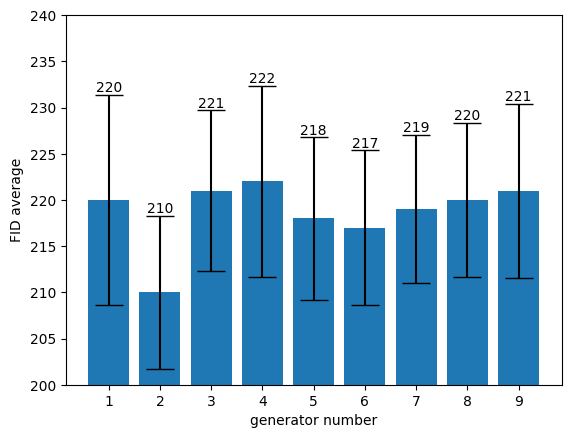

In [21]:
x = np.arange(1,len(generators)+1)
bars = plt.bar(x,np.around(fid_avg_np.mean(axis=1)),yerr=fid_avg_np.std(axis=1),ecolor='black',capsize=10)
plt.bar_label(bars,label_type='edge')
plt.xticks(x)
plt.xlabel('generator number')
plt.ylabel('FID average')
plt.ylim([200,240])
# plt.savefig('{}/worker_cont.png'.format(logger.writer.logdir))
plt.show()

In [18]:
df.to_csv('generator-results.csv',index=False)